In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline

train = pd.read_csv(r'C:\Users\Zarina Basheer\Downloads\Zarina ICTAK\MiniProjectSelected\train.csv') 

print (train.shape)

train.head()

#X_train

(293289, 59)


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0.0,...,9.0,1.0,5.0,8.0,0.0,1.0,1.0,0.0,0.0,1.0
1,9,0,1,1,7,0,0,0,0,1.0,...,3.0,1.0,1.0,9.0,0.0,1.0,1.0,0.0,1.0,0.0
2,13,0,5,4,9,1,0,0,0,1.0,...,4.0,2.0,7.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0
3,16,0,0,1,2,0,0,1,0,0.0,...,2.0,2.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,0,0,2,0,1,0,1,0,0.0,...,3.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0


Text(0.5, 0, 'target')

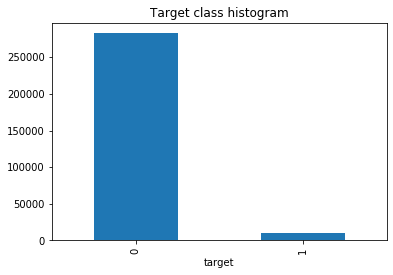

In [47]:
# Graph to show the Higly Imbalanced Data. To Predict the Column ['target']. Right now.. majority of records/rows with 'Target=0'
# And few records with 'Target = 1'
pd.value_counts(train['target']).plot.bar()
plt.title('Target class histogram')
plt.xlabel('target')


In [17]:
# Top 5 features with most missing data in training dataset
train = train.replace(-1, np.nan)
train_missing = train.isnull().sum().sort_values(ascending=False)
train_missing = pd.DataFrame(train_missing).reset_index()
train_missing.columns = ['Feature', 'Number of Data Records Missing']
train_missing.head()

,Feature,Number of Data Records Missing
0,ps_car_03_cat,202759
1,ps_car_05_cat,131284
2,ps_reg_03,53200
3,ps_car_14,20951
4,ps_car_07_cat,5533


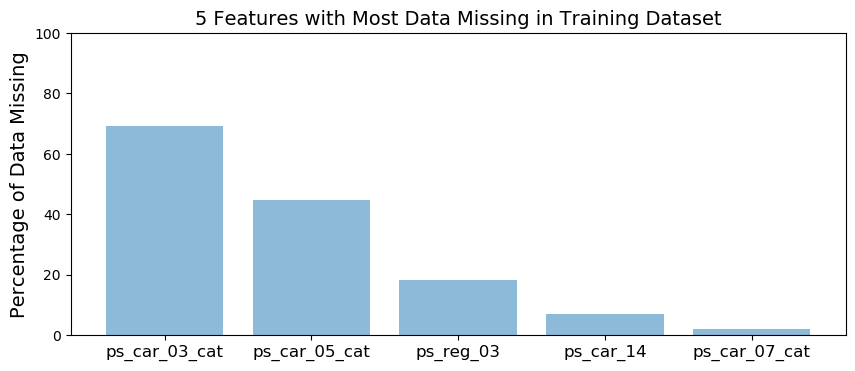

In [10]:
# Visualize the percentage of data missing
train_missingpercent = 100 * (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)

plt.figure(figsize = (10, 4), dpi = 100)
plt.bar(np.arange(5), train_missingpercent[:5], align='center', alpha=0.5)
plt.xticks(np.arange(5), train_missingpercent.index[:5], fontsize=12)
plt.ylim(0, 100)
plt.ylabel('Percentage of Data Missing', fontsize = 14)
plt.title('5 Features with Most Data Missing in Training Dataset', fontsize = 14) 
# plt.savefig('5 Features with Most Data Missing in Training Dataset.jpg')
plt.show()


In [18]:
# drop features 'ps_car_03_cat' and 'ps_car_05_cat'
train = train.drop(['ps_car_03_cat', 'ps_car_05_cat'], axis = 1)

train.shape
train.dtypes

id                  int64
target              int64
ps_ind_01           int64
ps_ind_02_cat     float64
ps_ind_03           int64
ps_ind_04_cat     float64
ps_ind_05_cat     float64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin     float64
ps_ind_09_bin     float64
ps_ind_10_bin     float64
ps_ind_11_bin     float64
ps_ind_12_bin     float64
ps_ind_13_bin     float64
ps_ind_14         float64
ps_ind_15         float64
ps_ind_16_bin     float64
ps_ind_17_bin     float64
ps_ind_18_bin     float64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat     float64
ps_car_02_cat     float64
ps_car_04_cat     float64
ps_car_06_cat     float64
ps_car_07_cat     float64
ps_car_08_cat     float64
ps_car_09_cat     float64
ps_car_10_cat     float64
ps_car_11_cat     float64
ps_car_11         float64
ps_car_12         float64
ps_car_13         float64
ps_car_14         float64
ps_car_15         float64
ps_calc_01        float64
ps_calc_02  

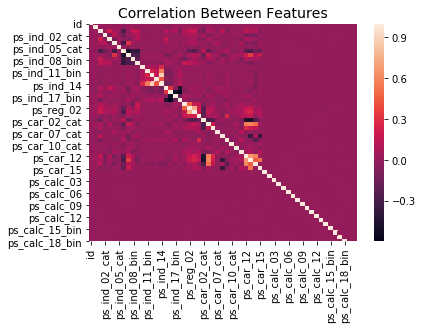

<Figure size 2200x1100 with 0 Axes>

In [20]:
# visualize the correlation between remaining features
import seaborn as sns
corr = train.corr()
sns.heatmap(corr)
plt.title("Correlation Between Features", fontsize = 14)
plt.xticks(rotation = 'vertical')
plt.figure(figsize = (20,10), dpi= 110)
# plt.savefig('Correlation Between Features.jpg')
plt.show()


In [21]:
# drop features with '_calc_' in feature names
feature_calc = list(train.columns[train.columns.str.contains('_calc_')])
train = train.drop(feature_calc, axis = 1)
print (train.shape)


(293289, 37)


In [22]:
# replace missing data in the remaining features
feature_bin = [f for f in train.columns if f.endswith('bin')] 
feature_cat = [f for f in train.columns if f.endswith('cat')] 
feature_els = [f for f in train.columns if (f not in feature_bin) & (f not in feature_cat) & (f not in ['id', 'target'])]


In [23]:
for f in (feature_bin + feature_cat):
    train[f].fillna(value=train[f].mode()[0], inplace=True)
   
for f in feature_els:
    train[f].fillna(value=train[f].mean(), inplace=True)

# Visualize binary features data and categorical features data (for styling, plot only features with 2 unique values)
plt.figure(figsize=(20, 20), dpi = 110)

<Figure size 2200x2200 with 0 Axes>

<Figure size 2200x2200 with 0 Axes>

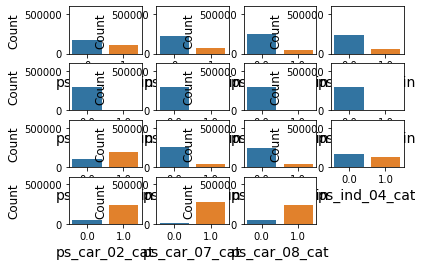

In [25]:
count = 0

for f in (feature_bin + feature_cat):
    if  train[f].nunique() <= 2:
        ax = plt.subplot(4, 4, count+1)
        sns.countplot(train[f])
        plt.xlabel(f, fontsize = 14)
        plt.ylabel("Count", fontsize = 12)
        plt.ylim(0, 600000)
        count += 1
        
# plt.savefig('Feature Data Distribution.jpg')
plt.show()

# ####

In [26]:
# Class count
count_class_0, count_class_1 = train.target.value_counts()

# Divide by class
df_class_0 = train[train['target'] == 0]
df_class_1 = train[train['target'] == 1]
print('Zero',count_class_0)
print('One',count_class_1)

Zero 282585
One 10704


Random under-sampling:
1    10704
0    10704
Name: target, dtype: int64


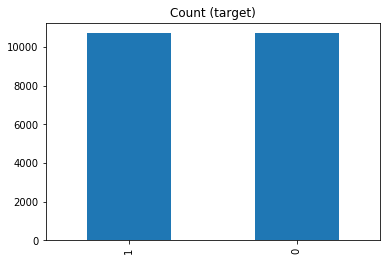

In [27]:
# Doing Random Undersampling 
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.target.value_counts())

df_test_under.target.value_counts().plot(kind='bar', title='Count (target)');

In [28]:
df_test_under.dtypes

id                 int64
target             int64
ps_ind_01          int64
ps_ind_02_cat    float64
ps_ind_03          int64
ps_ind_04_cat    float64
ps_ind_05_cat    float64
ps_ind_06_bin      int64
ps_ind_07_bin      int64
ps_ind_08_bin    float64
ps_ind_09_bin    float64
ps_ind_10_bin    float64
ps_ind_11_bin    float64
ps_ind_12_bin    float64
ps_ind_13_bin    float64
ps_ind_14        float64
ps_ind_15        float64
ps_ind_16_bin    float64
ps_ind_17_bin    float64
ps_ind_18_bin    float64
ps_reg_01        float64
ps_reg_02        float64
ps_reg_03        float64
ps_car_01_cat    float64
ps_car_02_cat    float64
ps_car_04_cat    float64
ps_car_06_cat    float64
ps_car_07_cat    float64
ps_car_08_cat    float64
ps_car_09_cat    float64
ps_car_10_cat    float64
ps_car_11_cat    float64
ps_car_11        float64
ps_car_12        float64
ps_car_13        float64
ps_car_14        float64
ps_car_15        float64
dtype: object

In [29]:
df_test_under.shape

(21408, 37)

In [30]:
# From Now modelling with Undersampled and balanced Data
train2=df_test_under
y = train2['target']
X = train2.drop(['target', 'id'], axis=1)
print(X.shape)
print(X.dtypes)
print(y.shape)

(21408, 35)
ps_ind_01          int64
ps_ind_02_cat    float64
ps_ind_03          int64
ps_ind_04_cat    float64
ps_ind_05_cat    float64
ps_ind_06_bin      int64
ps_ind_07_bin      int64
ps_ind_08_bin    float64
ps_ind_09_bin    float64
ps_ind_10_bin    float64
ps_ind_11_bin    float64
ps_ind_12_bin    float64
ps_ind_13_bin    float64
ps_ind_14        float64
ps_ind_15        float64
ps_ind_16_bin    float64
ps_ind_17_bin    float64
ps_ind_18_bin    float64
ps_reg_01        float64
ps_reg_02        float64
ps_reg_03        float64
ps_car_01_cat    float64
ps_car_02_cat    float64
ps_car_04_cat    float64
ps_car_06_cat    float64
ps_car_07_cat    float64
ps_car_08_cat    float64
ps_car_09_cat    float64
ps_car_10_cat    float64
ps_car_11_cat    float64
ps_car_11        float64
ps_car_12        float64
ps_car_13        float64
ps_car_14        float64
ps_car_15        float64
dtype: object
(21408,)


In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42) 


In [32]:
# Standard Scalar
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [37]:
#Model Number One Logistic Regresssion
from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression(class_weight={0:0, 1:1},random_state = 42 ,solver='lbfgs')
#classifier = LogisticRegression(class_weight='balanced',random_state = 0 ,solver='lbfgs')
classifier = LogisticRegression(random_state = 42 ,solver='lbfgs')
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
#y_pred 

In [38]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix: ', cm)

from sklearn.metrics import precision_score
pr=precision_score(y_test,y_pred)
print('Precision Score: ', pr)

from sklearn.metrics import recall_score
rc=recall_score(y_test,y_pred)
print('Recall Score: ', rc)

from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)
print('Accuracy Score: ', ac)

from sklearn.metrics import f1_score
Fone=f1_score(y_test,y_pred)
print('F1 Score: ',Fone)

from sklearn.metrics import classification_report
print (classification_report(y_test,y_pred))

Confusion Matrix:  [[2020 1223]
 [1436 1744]]
Precision Score:  0.5877991236939669
Recall Score:  0.5484276729559748
Accuracy Score:  0.5860189942394519
F1 Score:  0.5674312672848544
              precision    recall  f1-score   support

           0       0.58      0.62      0.60      3243
           1       0.59      0.55      0.57      3180

    accuracy                           0.59      6423
   macro avg       0.59      0.59      0.59      6423
weighted avg       0.59      0.59      0.59      6423



In [ ]:
## Predict Proba
#y_prob=classifier.predict_proba(X_test)
#y_pred_prob=y_prob[:,1]
#y_pred_prob=y_pred_prob.astype(int)
#accuracy_score(y_test,y_pred_prob)
#print (classification_report(y_test,y_pred_prob))
## standardization of non categorical features
##feature_non_cat = [f for f in train.columns if (f.endswith('cat') != True) & (f not in ['id', 'target'])]


In [43]:
### Model Number Two Random Forest #####
from sklearn.ensemble import RandomForestClassifier
rclf = RandomForestClassifier()
rclf.fit(X_train,y_train)
y_pred_rclf = rclf.predict(X_test)
cm_rclf=confusion_matrix(y_test,y_pred_rclf)
#print('Confusion Matrix Random Forest:' )
#cm_rclf

prlf=precision_score(y_test,y_pred_rclf)
print('Precision Score Random Forest: ', prlf)

rrlf=recall_score(y_test,y_pred_rclf)
print('Recall Score Random Forest: ', rrlf)

acclf=accuracy_score(y_test,y_pred_rclf)
print('Accuracy Score Random Forest: ', acclf)

frlf=f1_score(y_test,y_pred_rclf)
print('F1 Score Random Forest: ', frlf)

print (classification_report(y_test,y_pred_rclf))

C:\Users\Zarina Basheer\New folder\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Precision Score Random Forest:  0.5535714285714286
Recall Score Random Forest:  0.44842767295597485
Accuracy Score Random Forest:  0.5478748248482018
F1 Score Random Forest:  0.49548297428769983
              precision    recall  f1-score   support

           0       0.54      0.65      0.59      3243
           1       0.55      0.45      0.50      3180

    accuracy                           0.55      6423
   macro avg       0.55      0.55      0.54      6423
weighted avg       0.55      0.55      0.54      6423



In [ ]:
#y_prob_rclf=rclf.predict_proba(X_test)
#y_pred_prob_rclf=y_prob_rclf[:,1]
#y_pred_prob_rclf=y_pred_prob_rclf.astype(int)
#accuracy_score(y_test,y_pred_prob_rclf)
#print (classification_report(y_test,y_pred_prob_rclf))

In [44]:
# Model Number Three KNeighbors ##

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y_train)from sklearn.metrics import confusion_matrix
y_pred=classifier.predict(X_test)


In [45]:
from sklearn.metrics import confusion_matrix
cmknn=confusion_matrix(y_test,y_pred)
cmknn

array([[1805, 1438],
       [1506, 1674]], dtype=int64)

In [46]:
prknn=precision_score(y_test,y_pred)
print('Precision Score KNeighbors : ', prknn)

rknn=recall_score(y_test,y_pred)
print('Recall Score KNeighbors: ', rknn)


aknn=accuracy_score(y_test,y_pred)
print('Accuracy Score KNeighbors: ', aknn)


Fknn=f1_score(y_test,y_pred)
print('F1 Score KNeighbors: ',Fknn)

print (classification_report(y_test,y_pred))

Precision Score KNeighbors :  0.537917737789203
Recall Score KNeighbors:  0.5264150943396226
Accuracy Score KNeighbors:  0.5416472053557527
F1 Score KNeighbors:  0.5321042593769866
              precision    recall  f1-score   support

           0       0.55      0.56      0.55      3243
           1       0.54      0.53      0.53      3180

    accuracy                           0.54      6423
   macro avg       0.54      0.54      0.54      6423
weighted avg       0.54      0.54      0.54      6423



In [48]:
# Model Number Four SVM
from sklearn.svm import SVC
classifierVC=SVC(kernel='linear',random_state=0)
classifierVC.fit(X_train,y_train)
y_predVC=classifierVC.predict(X_test)



In [49]:
prsvc=precision_score(y_test,y_predVC)
print('Precision Score SVC : ', prsvc)

rsvc=recall_score(y_test,y_predVC)
print('Recall Score SVC: ', rsvc)


asvc=accuracy_score(y_test,y_predVC)
print('Accuracy Score SVC: ', asvc)


Fsvc=f1_score(y_test,y_predVC)
print('F1 Score SVC: ',Fsvc)

print (classification_report(y_test,y_predVC))

Precision Score SVC :  0.5985157699443414
Recall Score SVC:  0.5072327044025158
Accuracy Score SVC:  0.5875758991125642
F1 Score SVC:  0.5491063829787235
              precision    recall  f1-score   support

           0       0.58      0.67      0.62      3243
           1       0.60      0.51      0.55      3180

    accuracy                           0.59      6423
   macro avg       0.59      0.59      0.58      6423
weighted avg       0.59      0.59      0.58      6423



In [51]:
## Model Number Five Decision Tree ##
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion = "entropy", random_state = 100, 
            max_depth = 3, min_samples_leaf = 5)



# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_predclf = clf.predict(X_test)


In [52]:
prdt=precision_score(y_test,y_predclf)
print('Precision Score Decision Tree : ', prdt)

rdt=recall_score(y_test,y_predclf)
print('Recall Score Decision Tree: ', rdt)


adt=accuracy_score(y_test,y_predclf)
print('Accuracy Score SVC: ', adt)


Fdt=f1_score(y_test,y_predclf)
print('F1 Score SVC: ',Fdt)

print (classification_report(y_test,y_predclf))

Precision Score Decision Tree :  0.5555964653902798
Recall Score Decision Tree:  0.47452830188679246
Accuracy Score SVC:  0.5519227775182937
F1 Score SVC:  0.5118724559023066
              precision    recall  f1-score   support

           0       0.55      0.63      0.59      3243
           1       0.56      0.47      0.51      3180

    accuracy                           0.55      6423
   macro avg       0.55      0.55      0.55      6423
weighted avg       0.55      0.55      0.55      6423

